# LEVEL 1 TASK - UNEMPLOYMENT IN INDIA

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.

 We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
!pip install --upgrade scikit-learn

**1.Import csv file**

In [3]:
df=pd.read_csv("Unemployment in India.csv")#import csv files into a dataframe

**2. Get the informations regarding the data frame**

In [4]:
df.info()#information regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
Region                                      740 non-null object
 Date                                       740 non-null object
 Frequency                                  740 non-null object
 Estimated Unemployment Rate (%)            740 non-null float64
 Estimated Employed                         740 non-null float64
 Estimated Labour Participation Rate (%)    740 non-null float64
Area                                        740 non-null object
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.head()#first 5 rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**3. Get Summary statistics for both numerical and non-numerical columns**

In [6]:
df.describe(include='all')#Summary statistics for both numerical and non-numerical columns.

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Tamil Nadu,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


**4. Remove null values from the dataframe**

In [7]:
df.dropna(inplace=True)# Remove null values

In [8]:
df.info() 
# 740 Rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
Region                                      740 non-null object
 Date                                       740 non-null object
 Frequency                                  740 non-null object
 Estimated Unemployment Rate (%)            740 non-null float64
 Estimated Employed                         740 non-null float64
 Estimated Labour Participation Rate (%)    740 non-null float64
Area                                        740 non-null object
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


**5. Identify whether there are missing values in the dataframe**

In [9]:
missing_values_summary = df.isnull().sum()
missing_values_summary# No missing values

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

**6. Identify Outliers in the numerical columns**

Outliers are values that are unusually high or low compared to the majority of the data points.
Identifying outliers is important in data analysis because they can distort statistical analyses, affect the assumptions of many statistical models, and impact the overall interpretation of results.

1: **Plot boxplot**-The boxplot provides a visual representation of the distribution of each variable.
                 Outliers can be visually identified as points beyond the whiskers of the boxplots.
                 
2: **Calculate z score** - Z-scores are calculated for each data point in your numerical columns.
                       A z-score measures how many standard deviations a data point is from the mean
                       
3: **Rows with z-scores greater than 3 in at least one variable are considered outliers**

In [10]:
numeric_columns=[' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)']
#create a list with all the numeric columns

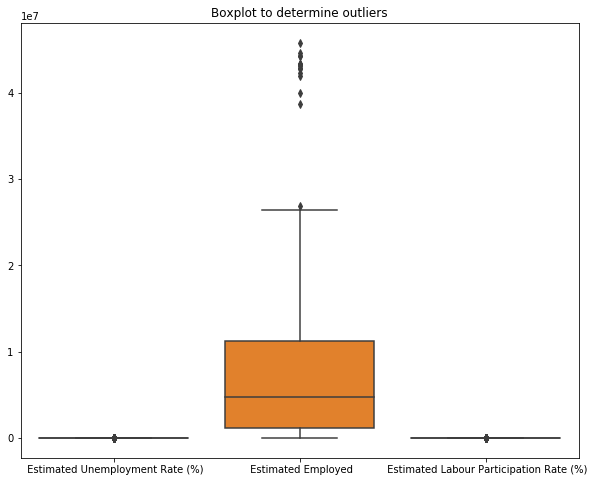

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot to determine outliers')
plt.show()

In [12]:
#Z score = (individual data -mean)/standard deviation
z_scores = ((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()).abs()

In [13]:
outliers = (z_scores > 3).any(axis=1) #Rows with z-scores greater than 3 in at least one variable are considered outliers

In [14]:
print("Rows containing outliers:")
df[outliers]

Rows containing outliers:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
37,Bihar,30-04-2020,Monthly,45.09,14645275.0,38.63,Rural
38,Bihar,31-05-2020,Monthly,47.26,14050319.0,38.50,Rural
145,Jharkhand,31-05-2020,Monthly,55.10,3315038.0,37.03,Rural
172,Kerala,30-04-2020,Monthly,10.71,1754170.0,13.33,Rural
209,Meghalaya,30-11-2019,Monthly,1.50,1205703.0,69.03,Rural
211,Meghalaya,31-01-2020,Monthly,0.97,1229406.0,69.66,Rural
213,Meghalaya,31-03-2020,Monthly,1.28,1192616.0,67.46,Rural
242,Puducherry,30-04-2020,Monthly,74.51,49420.0,46.79,Rural
287,Tamil Nadu,30-04-2020,Monthly,53.19,5086200.0,33.05,Rural
294,Telangana,30-09-2019,Monthly,5.49,12636415.0,72.57,Rural


**7. Replace outliers with the mean values**

In [15]:
df[numeric_columns] = np.where(outliers[:, None], df[numeric_columns].mean(), df[numeric_columns])
#np.where - same as if function
#outliers[:, None] - to align outliers with the shape of df[numeric_columns]

In [16]:
df[outliers]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
37,Bihar,30-04-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
38,Bihar,31-05-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
145,Jharkhand,31-05-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
172,Kerala,30-04-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
209,Meghalaya,30-11-2019,Monthly,11.787946,7.204460e+06,42.630122,Rural
211,Meghalaya,31-01-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
213,Meghalaya,31-03-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
242,Puducherry,30-04-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
287,Tamil Nadu,30-04-2020,Monthly,11.787946,7.204460e+06,42.630122,Rural
294,Telangana,30-09-2019,Monthly,11.787946,7.204460e+06,42.630122,Rural


**8. Change date column to date specific datatype**

It will improve performance for date-related operations compared objects.

In [17]:
df[' Date'] = pd.to_datetime(df[' Date'])
#pd.to_datetime - pandas function to convert and object or string into datetime64 data type

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
Region                                      740 non-null object
 Date                                       740 non-null datetime64[ns]
 Frequency                                  740 non-null object
 Estimated Unemployment Rate (%)            740 non-null float64
 Estimated Employed                         740 non-null float64
 Estimated Labour Participation Rate (%)    740 non-null float64
Area                                        740 non-null object
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


**9. convert the cleaned data into a csv file**

In [35]:
df.to_csv('cleaned_data.csv', index=False)

#### 10. Data Visualization

**Tableau** is used for data visualization. 


In [27]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


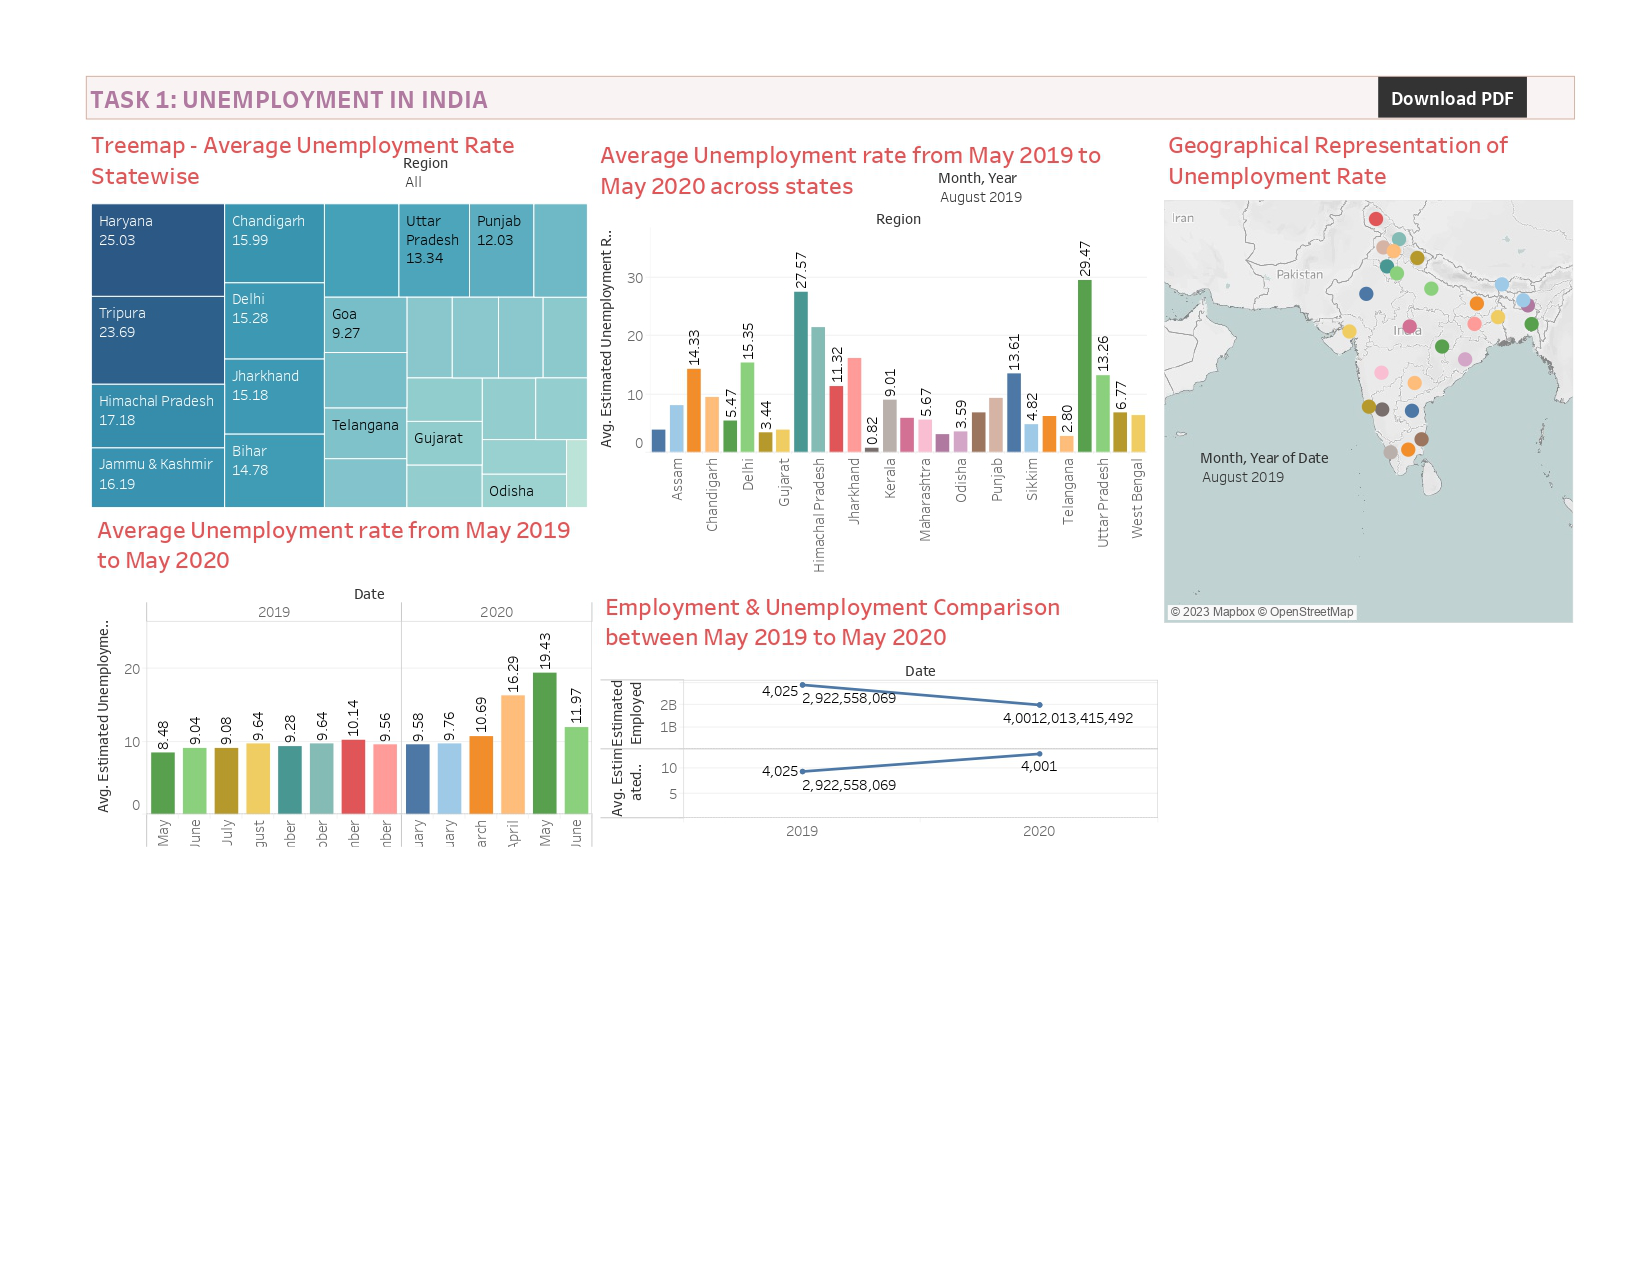

In [41]:
from PIL import Image

# Path to the JPG file on your local machine
jpg_path = 'Task 1_Unemployment in India - 1_page-0001.jpg'

# Open the JPG file
jpg_image = Image.open(jpg_path)
display(jpg_image)

As per the analysis, it is found that Haryana has the highest average unemployment rate from May 2019 to May 2020.

From May 2019 to May 2020 time period, May 2020 has the highest average unemployment rate.


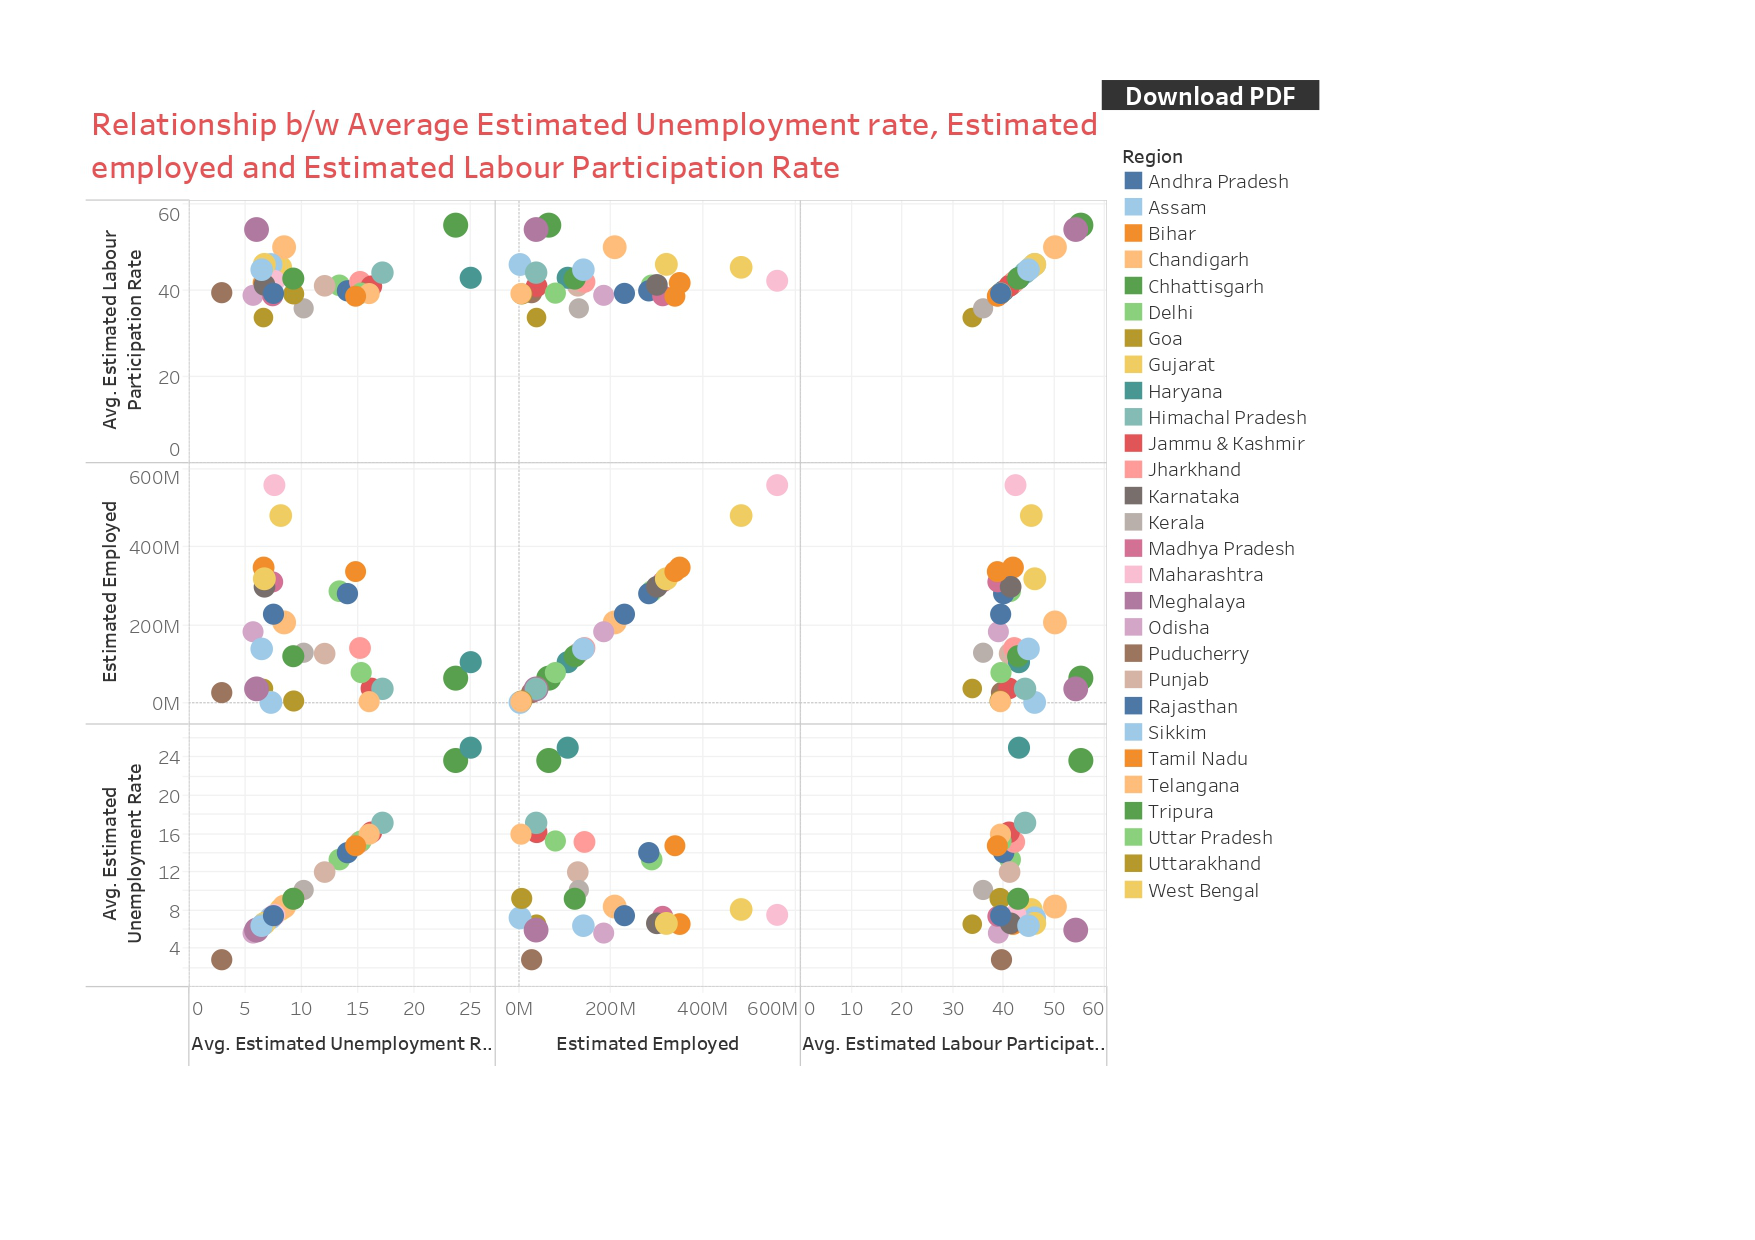

In [40]:
from PIL import Image

# Path to the JPG file on your local machine
jpg_path = 'Task 1_Unemployment in India - 2_page-0001.jpg'

# Open the JPG file
jpg_image = Image.open(jpg_path)
display(jpg_image)